In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [29]:
data = {}

with open('run4.out', 'r') as file:
    for line in file:
        lst = re.findall('(seq[a-z_]+): ([0-9\.]+)', line)
        if len(lst) > 0:
            if lst[0][0] not in data:
                data[lst[0][0]] = []

            data[lst[0][0]].append(float(lst[0][1]))

df = pd.DataFrame(data)

In [30]:
df

,seq_bmlp_time,seq_int_time,seq_emb_time,seq_tmlp_time
0,0.403811,0.192183,11.660808,10.185565
1,0.409322,0.207682,16.206861,10.224535
2,0.408686,0.210386,25.592137,10.427875
3,0.547846,0.284589,93.846167,12.947029
4,0.554703,0.306658,185.161525,12.901531
5,0.541039,0.343714,335.486680,12.960213
6,0.233983,0.277290,4.682240,2.113193
7,0.215733,0.267179,4.456558,1.955129
8,0.227659,0.278836,7.478981,2.036516
9,0.290362,0.281219,10.600085,2.081176


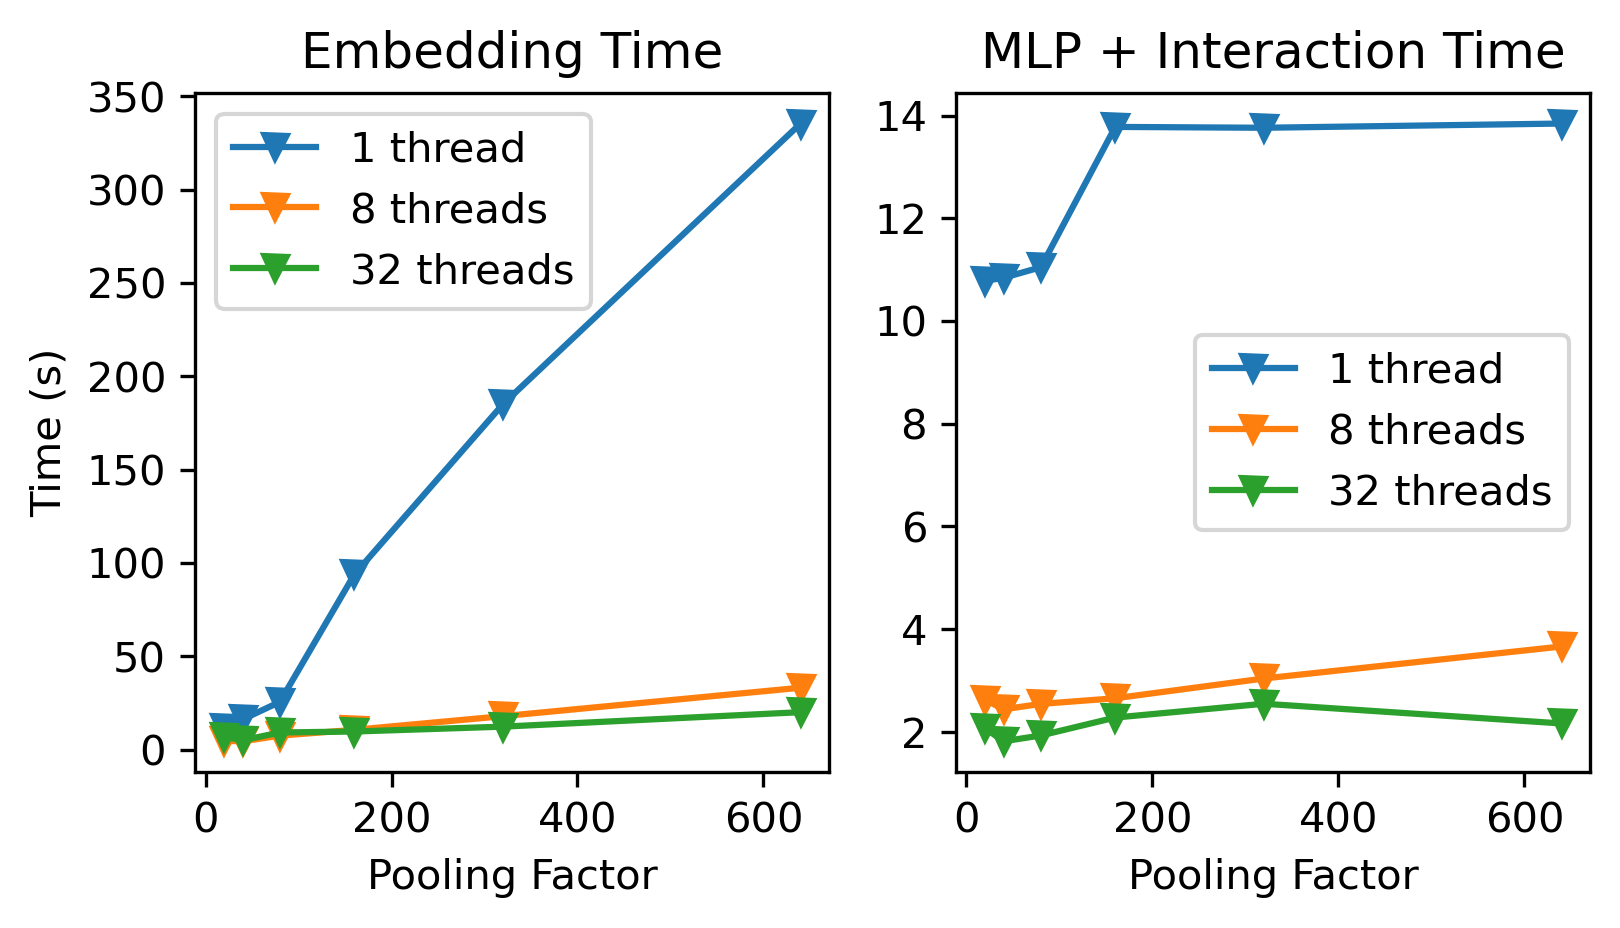

In [31]:
fig, axs = plt.subplots(1, 2)
fig.set_dpi(300)
fig.set_size_inches(6, 3)

axs[0].plot([20, 40, 80, 160, 320, 640], df.seq_emb_time[:6], '-v', label='1 thread')
axs[0].plot([20, 40, 80, 160, 320, 640], df.seq_emb_time[6:12], '-v', label='8 threads')
axs[0].plot([20, 40, 80, 160, 320, 640], df.seq_emb_time[12:], '-v', label='32 threads')
axs[0].legend()
axs[0].set_title('Embedding Time')
axs[0].set_xlabel('Pooling Factor')
axs[0].set_ylabel('Time (s)')


axs[1].plot([20, 40, 80, 160, 320, 640], (df.seq_bmlp_time + df.seq_int_time + df.seq_tmlp_time)[:6], '-v', label='1 thread')
axs[1].plot([20, 40, 80, 160, 320, 640], (df.seq_bmlp_time + df.seq_int_time + df.seq_tmlp_time)[6:12], '-v', label='8 threads')
axs[1].plot([20, 40, 80, 160, 320, 640], (df.seq_bmlp_time + df.seq_int_time + df.seq_tmlp_time)[12:], '-v', label='32 threads')
axs[1].legend()
axs[1].set_title('MLP + Interaction Time')
axs[1].set_xlabel('Pooling Factor')

fig.savefig('embedding_vs_mlp_time.png', dpi=500)